<h1 align="center">Scraping Seblak from Tokopedia</h1>

# Import Libraries

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from time import sleep

# Scraping

## Initialize Page

In [ ]:
# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# URL of the page to be scraped
url = "https://www.tokopedia.com/search?q=seblak&source=universe&st=product&srp_component_id=02.07.01.01"

# Open the webpage using the driver
driver.get(url)

# Get the HTML structure of the loaded page
html = driver.page_source

# Parse the HTML content using BeautifulSoup for better readability and manipulation
soup = BeautifulSoup(html, "html.parser")

# Display the prettified (formatted) HTML to understand its structure
print(soup.prettify())

<html data-rh="lang,translate" lang="id" translate="no">
 <head>
  <title>
   Jual seblak | Tokopedia
  </title>
  <meta charset="utf-8"/>
  <meta content="initial-scale=1, minimum-scale=1, maximum-scale=5, user-scalable=yes, width=device-width" name="viewport"/>
  <link crossorigin="" href="https://assets.tokopedia.net" rel="preconnect"/>
  <link href="https://assets.tokopedia.net" nonce="" rel="dns-prefetch"/>
  <link crossorigin="" href="https://gql.tokopedia.com" rel="preconnect"/>
  <link href="https://gql.tokopedia.com" nonce="" rel="dns-prefetch"/>
  <link crossorigin="" href="https://googleads.g.doubleclick.net" rel="preconnect"/>
  <link href="https://googleads.g.doubleclick.net" nonce="" rel="dns-prefetch"/>
  <link crossorigin="" href="https://www.google-analytics.com" rel="preconnect"/>
  <link href="https://www.google-analytics.com" nonce="" rel="dns-prefetch"/>
  <link crossorigin="" href="https://images.tokopedia.net" rel="preconnect"/>
  <link href="https://images.tokop

## Checking

In [ ]:
# Find product elements on the page
soup.find('div',{"class":"VKNwBTYQmj8+cxNrCQBD6g=="}).get_text()

'Kylafood Seblak Rempah Autentik isi (5pcs)'

In [ ]:
# Find price elements on the page
soup.find('div',{"class":"_8cR53N0JqdRc+mQCckhS0g=="}).get_text()

'Rp61.275'

In [ ]:
# Find shop name elements on the page
soup.find('span',{"class":"X6c-fdwuofj6zGvLKVUaNQ=="}).get_text()

'Lidigeli'

In [ ]:
# Find city elements on the page
soup.find('span',{"class":"-9tiTbQgmU1vCjykywQqvA== flip"}).get_text()

'Kab. Garut'

In [ ]:
# Find sold count elements on the page
soup.find('span',{"class":"eLOomHl6J3IWAcdRU8M08A=="}).get_text()

'100+ terjual'

In [ ]:
# Find rating elements on the page
soup.find('span',{"class":"nBBbPk9MrELbIUbobepKbQ=="}).get_text()

'4.8'

## Scraping Web

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
from time import sleep
import pandas as pd

# Initialize empty lists to store scraped data
names = []
prices = []
sellers = []
cities = []
sold = []
ratings = []

# Start the Chrome WebDriver
driver = webdriver.Chrome()

# Loop through pages 1 to 10
for i in range(1, 11):
    url = f"https://www.tokopedia.com/search?q=seblak&source=universe&st=product&srp_component_id=02.07.01.01{i}"
    sleep(1)
    
    driver.get(url)

    # Automatically scroll the page to load content dynamically
    for scroll in range(15):  
        driver.execute_script("window.scrollBy(0, 250)")
        sleep(1)

    # Parse the page content using BeautifulSoup
    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")

    # Scrape each element using their corresponding class name
    try:
        name_items = [n.get_text() for n in soup.find_all('div', {"class": "VKNwBTYQmj8+cxNrCQBD6g=="})]
        price_items = [h.get_text() for h in soup.find_all('div', {"class": "_8cR53N0JqdRc+mQCckhS0g=="})]
        seller_items = [p.get_text() for p in soup.find_all('span', {"class": "X6c-fdwuofj6zGvLKVUaNQ=="})]
        city_items = [k.get_text() for k in soup.find_all('span', {"class": "-9tiTbQgmU1vCjykywQqvA== flip"})]
        sold_items = [l.get_text() for l in soup.find_all('span', {"class": "eLOomHl6J3IWAcdRU8M08A=="})]
        rating_items = [r.get_text() for r in soup.find_all('span', {"class": "nBBbPk9MrELbIUbobepKbQ=="})]

        # Normalize list lengths by padding with None values if needed
        max_length = max(len(name_items), len(price_items), len(seller_items), len(city_items), len(sold_items), len(rating_items))
        names += name_items + ['None'] * (max_length - len(name_items))
        prices += price_items + ['None'] * (max_length - len(price_items))
        sellers += seller_items + ['None'] * (max_length - len(seller_items))
        cities += city_items + ['None'] * (max_length - len(city_items))
        sold += sold_items + ['None'] * (max_length - len(sold_items))
        ratings += rating_items + ['None'] * (max_length - len(rating_items))

        print(f"Page {i} data: names={len(name_items)}, prices={len(price_items)}, sellers={len(seller_items)}, cities={len(city_items)}, sold={len(sold_items)}, ratings={len(rating_items)}")
    
    except Exception as e:
        print(f"An error occurred on page {i}: {e}")

# Close the browser after scraping is complete
driver.close()

# Create DataFrame if all lists are of equal length
if len(names) == len(prices) == len(sellers) == len(cities) == len(sold) == len(ratings):
    data = pd.DataFrame({
        'Product Name': names,
        'Price': prices,
        'Seller': sellers,
        'City': cities,
        'Sold': sold,
        'Rating': ratings
    })

    # Replace 'None' strings with actual missing values and drop rows with any missing data
    data.replace('None', pd.NA, inplace=True)
    data.dropna(inplace=True)

    print(data)
else:
    print("Mismatch in list lengths. Please review the scraping logic.")
    print(f"Final lengths: names={len(names)}, prices={len(prices)}, sellers={len(sellers)}, cities={len(cities)}, sold={len(sold)}, ratings={len(ratings)}")


Page 1 lengths: nama=78, harga=78, penjual=75, kota=75, laris=71, rating=74
Page 2 lengths: nama=78, harga=78, penjual=75, kota=75, laris=71, rating=74
Page 3 lengths: nama=78, harga=78, penjual=75, kota=75, laris=71, rating=74
Page 4 lengths: nama=78, harga=78, penjual=75, kota=75, laris=71, rating=74
Page 5 lengths: nama=68, harga=68, penjual=65, kota=65, laris=61, rating=64
Page 6 lengths: nama=68, harga=68, penjual=65, kota=65, laris=61, rating=64
Page 7 lengths: nama=68, harga=68, penjual=65, kota=65, laris=61, rating=64
Page 8 lengths: nama=68, harga=68, penjual=65, kota=65, laris=61, rating=64
Page 9 lengths: nama=68, harga=68, penjual=65, kota=65, laris=61, rating=64
Page 10 lengths: nama=68, harga=68, penjual=65, kota=65, laris=61, rating=64
                                                  Nama     Harga  \
0    Paket Happy (Seblak Original, Batagor Kuah, Ba...  Rp59.000   
1           Kylafood Seblak Rempah Autentik isi (5pcs)  Rp61.275   
2                                  

## Saving

In [ ]:
# Save the DataFrame to a CSV file
data_multipage.to_csv('data_seblak.csv', index=False)

The scraping results data was successfully saved in the form of a .csv file.

## Data Preparation

### Data Exploration

In [ ]:
# Load data
df = pd.read_csv('data_seblak.csv')

df

,Nama,Harga,Penjual,Kota,Laris,Rating
0,"Paket Happy (Seblak Original, Batagor Kuah, Ba...",Rp59.000,Lidigeli,Kab. Garut,100+ terjual,4.9
1,Kylafood Seblak Rempah Autentik isi (5pcs),Rp61.275,AHR Jaya Snack,Jakarta Timur,80+ terjual,4.8
2,Seblak Karuhun,Rp11.475,Foodstocks,Jakarta Selatan,500+ terjual,5.0
3,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,Rp29.000,ismileusa_id,Kab. Bandung,750+ terjual,4.9
4,KERUPUK PEDAS KRIWIL BANTAT ISI 250gr KRITING ...,Rp17.248,Golden Cakery,Jakarta Pusat,100+ terjual,5.0
...,...,...,...,...,...,...
645,"Seblak Rafael, Seblak Coet Instan Halal",Rp25.000,Beauty DELUXE,Jakarta Barat,750+ terjual,4.7
646,"PAKET BUNDLING 4 ( 1 SEBLAK INSTANT, 1 KEJU AR...",Rp40.000,AMANA SNACK,Tangerang Selatan,70+ terjual,5.0
647,Cuanki Lidah 50 pcs topingan seblak baso Aci b...,Rp15.000,Ummuchasna,Kab. Magelang,750+ terjual,4.9
648,Seblak RAFAEL | Seblak MAMANG RAFAEL | Seblak ...,Rp44.500,ajs(ale jaya snack),Jakarta Utara,30+ terjual,4.7


1. Pada kolom **Harga** hapus nilai dari 'Rp'.
2. Pada kolom **Laris** juga hapus nilai dari '+' dan 'terjual'.

In [4]:
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
Nama       0
Harga      0
Penjual    0
Kota       0
Laris      0
Rating     0
dtype: int64


1. Tidak ada missing value di semua kolom. Hal ini sudah ditangani dengan diisi dengan nilai **None** (jika ada nilai yang kosong) pada saat Web Scraping.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nama     650 non-null    object 
 1   Harga    650 non-null    object 
 2   Penjual  650 non-null    object 
 3   Kota     650 non-null    object 
 4   Laris    650 non-null    object 
 5   Rating   650 non-null    float64
dtypes: float64(1), object(5)
memory usage: 30.6+ KB


1. Data ini memiliki 650 entri dan 6 kolom.
2. Kolom **Harga** berbentuk object dimana harus diubah ke float terlebih dahulu.
3. Kolom **Laris** juga harusnya berbentuk interger bukan object.
4. Total tipe data ada 5 yang memiliki tipe object dan 1 yang memiliki tipe float jika tipe kolom **Harga** dan **Laris** belum diubah.

### 2. Data Cleaning

In [6]:
# Ubah kolom harga jadi float dan menghapus nilai 'Rp'
df['Harga'] = df['Harga'].astype(str).str.replace('Rp', '').str.replace('.', '', regex=False)
df['Harga'] = df['Harga'].astype(float)
df['Harga'] = df['Harga'].fillna('')

In [7]:
# Ubah kolom laris jadi interger dan menghapus nilai '+' dan 'terjual'
df['Laris'] = df['Laris'].astype(str).fillna('')
df['Laris'] = df['Laris'].str.replace(' terjual', '')
df['Laris'] = df['Laris'].replace({'rb': '000'}, regex=True)
df['Laris'] = df['Laris'].str.replace('+', '').astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nama     650 non-null    object 
 1   Harga    650 non-null    float64
 2   Penjual  650 non-null    object 
 3   Kota     650 non-null    object 
 4   Laris    650 non-null    int32  
 5   Rating   650 non-null    float64
dtypes: float64(2), int32(1), object(3)
memory usage: 28.1+ KB


Tipe kolom dari **Harga** dan **Laris** berhasil diubah.

In [9]:
df

,Nama,Harga,Penjual,Kota,Laris,Rating
0,"Paket Happy (Seblak Original, Batagor Kuah, Ba...",59000.0,Lidigeli,Kab. Garut,100,4.9
1,Kylafood Seblak Rempah Autentik isi (5pcs),61275.0,AHR Jaya Snack,Jakarta Timur,80,4.8
2,Seblak Karuhun,11475.0,Foodstocks,Jakarta Selatan,500,5.0
3,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,29000.0,ismileusa_id,Kab. Bandung,750,4.9
4,KERUPUK PEDAS KRIWIL BANTAT ISI 250gr KRITING ...,17248.0,Golden Cakery,Jakarta Pusat,100,5.0
...,...,...,...,...,...,...
645,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,Beauty DELUXE,Jakarta Barat,750,4.7
646,"PAKET BUNDLING 4 ( 1 SEBLAK INSTANT, 1 KEJU AR...",40000.0,AMANA SNACK,Tangerang Selatan,70,5.0
647,Cuanki Lidah 50 pcs topingan seblak baso Aci b...,15000.0,Ummuchasna,Kab. Magelang,750,4.9
648,Seblak RAFAEL | Seblak MAMANG RAFAEL | Seblak ...,44500.0,ajs(ale jaya snack),Jakarta Utara,30,4.7


Bentuk data dari kolom **Harga** dan **Laris** berhasil diubah.

## C. Business Understanding/Problem Statement

### SMART Framework

- ***Spesific***: Meningkatkan penjualan produk seblak yang paling laris di toko sebesar 10% dalam tiga bulan ke depan dengan menganalisis data harga produk, rating, dan kinerja penjual.

- ***Measurable***: Meningkatkan total penjualan sebesar 10% untuk 5 produk teratas dalam jangka waktu tiga bulan.

- ***Achievable***: Mengembangkan strategi pemasaran dan penjualan yang berbasis data, termasuk promosi produk yang diidentifikasi sebagai yang paling menguntungkan serta penyesuaian stok berdasarkan analisis penjualan sebelumnya.

- ***Relevant***: Peningkatan penjualan makanan sangat penting untuk meningkatkan keuntungan dan pangsa pasar di industri makanan, sejalan dengan tujuan perusahaan untuk tumbuh secara berkelanjutan di pasar ini.

- ***Time-bound***: Mencapai peningkatan penjualan sebesar 10% dalam waktu 3 bulan.

### Problem Statement

Penjualan produk seblak di Tokopedia belum optimal meskipun memiliki rating tinggi, sehingga diperlukan strategi peningkatan penjualan sebesar 10% dalam tiga bulan melalui analisis harga, penjual, dan promosi yang tepat.

### Business/Analysist Metrics

Metriks bisnis yang dipilih dalam analisa ini merupakan nilai dari nama produk, harga produk, nama dari penjual, lokasi penjual (kota), total penjualan (laris), dan rating dari produk.

## D. Analysis

### 1. Hitung rata-rata, median, standar deviasi, skewness, dan kurtosis dari kolom harga, banyak produk terjual, dan rating.

- Kolom **Harga**.

In [10]:
# Ambil nilai rata-rata dan median
print('rata-rata:',df['Harga'].mean())
print('median:',df['Harga'].median())

# Ambil nilai standard deviasi
std = df['Harga'].std()
print('standard deviasi:',std)

#Ambil nilai skewness dan kurtosis
print(f"skewness: {df['Harga'].skew()}")
print(f"kurtosis: {df['Harga'].kurtosis()}")

rata-rata: 21419.51846153846
median: 19000.0
standard deviasi: 15884.206870598833
skewness: 1.3174212625659742
kurtosis: 1.938541066947879


1. Rata-rata harga produk berada di 21419. Ini menunjukkan harga rata-rata di pasaran, meskipun harga individual dapat bervariasi. Namun, dengan adanya nilai median yang lebih rendah dengan harga 19000 bisa diindikasikan bahwa ada beberapa produk dengan harga yang jauh lebih tinggi daripada mayoritas produk lain.
2. Standar deviasi berada di 15884. Ini menunjukkan bahwa ada variasi yang cukup besar dalam harga produk. Harga produk memiliki penyebaran yang cukup lebar di sekitar rata-rata.
3. Skewness bernilai 1,31 yang menunjukkan bahwa distribusi harga memiliki kecondongan ke kanan (positif skewed). Ini berarti ada beberapa produk dengan harga yang jauh lebih tinggi daripada kebanyakan produk lain. Harga-harga yang sangat tinggi inilah yang menjadi outlier alami, dan mereka memengaruhi rata-rata lebih besar daripada median.
4. Nilai kurtosis sebesar 1,93 menunjukkan bahwa distribusi harga memiliki nilai yang lebih tinggi dibandingkan distribusi normal dimana ada lebih banyak produk dengan harga yang berada jauh dari rata-rata (outliers) dibandingkan dengan distribusi normal. Namun, kurtosis yang tidak terlalu tinggi menunjukkan bahwa outlier ini masih dalam batas wajar untuk distribusi alami dari harga produk.

Visualisasi untuk melihat persebaran data pada kolom **Harga**.

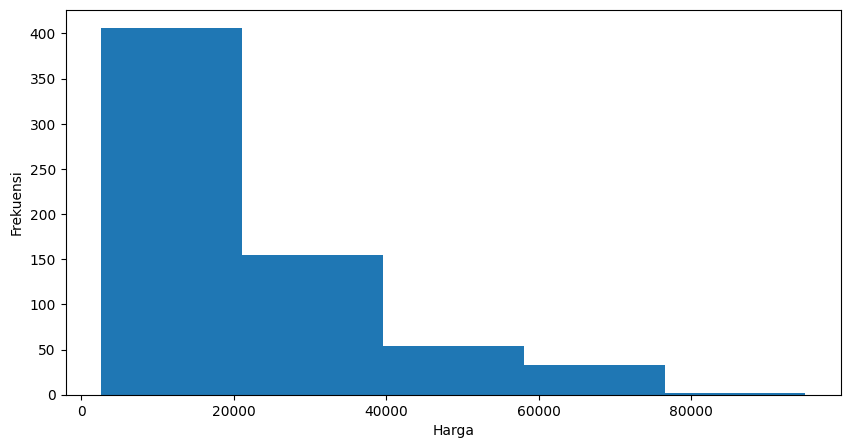

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['Harga'].plot(kind='hist', bins=5)
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

Dari visualisasi ini dapat terlihat bahwa terdapat perbedaan (outlier) pada kolom **Harga** yang condong ke kanan.

- Kolom **Laris**.

In [12]:
# Ambil nilai rata-rata dan median
print('rata-rata:',df['Laris'].mean())
print('median:',df['Laris'].median())

# Ambil nilai standard deviasi
std = df['Laris'].std()
print('standard deviasi:',std)

#Ambil nilai skewness dan kurtosis
print(f"skewness: {df['Laris'].skew()}")
print(f"kurtosis: {df['Laris'].kurtosis()}")

rata-rata: 908.0707692307692
median: 100.0
standard deviasi: 1999.6041005480376
skewness: 3.4316517850434605
kurtosis: 11.820943982285204


1. Rata-rata jumlah penjualan produk adalah sekitar 908. Ini menunjukkan bahwa, secara rata-rata, produk terjual dalam jumlah yang cukup besar. Namun, jika kita membandingkan dengan median yang memiliki nilai sangat jauh lebih rendah terlihat bahwa ada beberapa produk dengan penjualan yang sangat tinggi.
2. Standar deviasi sekitar 1999 menunjukkan bahwa ada variasi yang sangat besar dalam jumlah penjualan produk seblak. Penjualan produk sangat bervariasi, dari produk yang sangat sedikit terjual hingga produk yang laris dengan penjualan sangat tinggi.
3. Nilai skewness sebesar 3,43 menunjukkan bahwa distribusi penjualan condong ke kanan (positif skewed). Ini berarti ada beberapa produk yang terjual dalam jumlah sangat tinggi. Produk dengan penjualan yang sangat tinggi ini menjadi outlier alami dan menyebabkan distribusi tidak simetris.
4. Nilai kurtosis sebesar 11,82 menunjukkan bahwa distribusi penjualan memiliki nilai yang lebih tinggi dibandingkan dengan distribusi normal. Ini menandakan adanya outlier ekstrem di data, yaitu beberapa produk yang terjual dalam jumlah yang jauh lebih besar daripada produk lainnya.

Visualisasi untuk melihat persebaran pada kolom **Laris**.

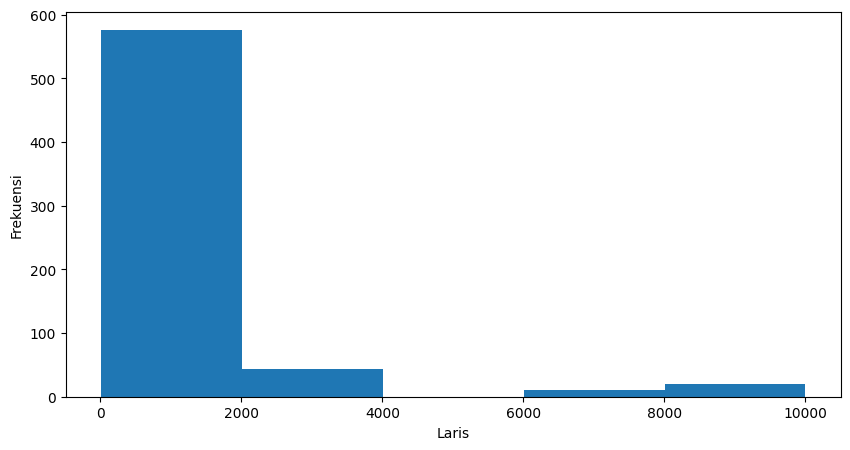

In [13]:
plt.figure(figsize=(10, 5))
df['Laris'].plot(kind='hist', bins=5)
plt.xlabel('Laris')
plt.ylabel('Frekuensi')
plt.show()

Dari visualisasi ini dapat terlihat bahwa terdapat perbedaan (outlier) pada kolom **Laris** yang condong ke kanan.

- Kolom **Rating**.

In [14]:
# Ambil nilai rata-rata dan median
print('rata-rata:',df['Rating'].mean())
print('median:',df['Rating'].median())

# Ambil nilai standard deviasi
std = df['Rating'].std()
print('standard deviasi:',std)

#Ambil nilai skewness dan kurtosis
print(f"skewness: {df['Rating'].skew()}")
print(f"kurtosis: {df['Rating'].kurtosis()}")

rata-rata: 4.871846153846153
median: 4.9
standard deviasi: 0.11043257580416903
skewness: -1.009914554565576
kurtosis: 1.076083752787281


1. Rata-rata rating produk seblak adalah 4.87. Hal ini menunjukkan bahwa secara umum produk seblak mendapatkan ulasan yang sangat baik dari pelanggan. Rating ini hampir mendekati nilai rating maksimal yang menunjukkan kualitas produk terlihat bagus oleh pembeli.
2. Standar deviasi sekitar 0.11. Hal ini menunjukkan bahwa variasi dalam rating sangat kecil dimana mayoritas produk memiliki rating yang sangat mirip satu sama lain. Hampir semua produk dinilai cukup baik oleh pembeli tanpa banyak perbedaan besar.
3. Nilai skewness sebesar -1.01 menunjukkan bahwa distribusi rating sedikit skewed ke kiri (negatif skewed). Ini berarti ada lebih banyak produk yang memiliki rating mendekati 5 dibandingkan produk dengan rating rendah.
4. Nilai kurtosis sebesar 1.07 menunjukkan bahwa distribusi rating memiliki bentuk yang relatif normal. Ini berarti ada beberapa produk dengan rating sangat tinggi atau sangat rendah, tetapi tidak terlalu banyak outlier ekstrem.

Visualisasi untuk melihat persebaran data pada kolom **rating**.

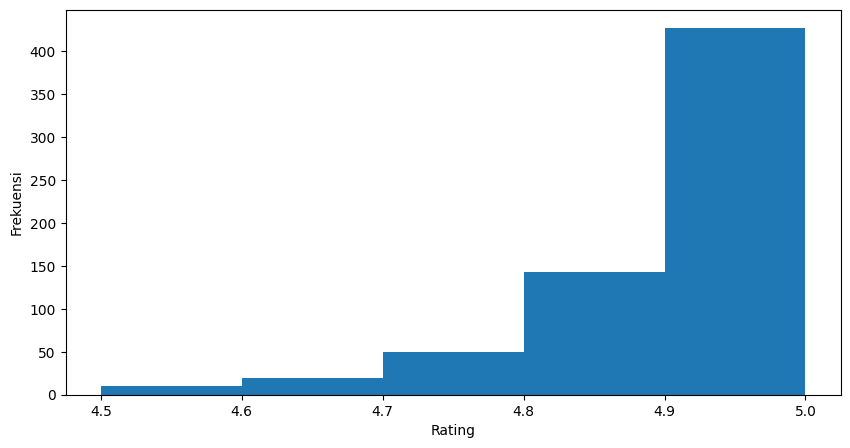

In [15]:
plt.figure(figsize=(10, 5))
df['Rating'].plot(kind='hist', bins=5)
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

Dari visualisasi ini dapat terlihat bahwa terdapat perbedaan (outlier) pada kolom **Rating** yang condong ke kiri.

### 2. Berapa potensi minimum dan maksimum pendapatan jika kamu menjual produk seblak?

In [14]:
df[['Harga', 'Laris']].describe()

,Harga,Laris
count,650.000000,650.000000
mean,21419.518462,908.070769
std,15884.206871,1999.604101
min,2600.000000,7.000000
25%,8000.000000,60.000000
50%,19000.000000,100.000000
75%,29000.000000,750.000000
max,95000.000000,10000.000000


In [16]:
from scipy import stats
import numpy as np

df['Pendapatan'] = df['Harga'] * df['Laris']

std = df['Pendapatan'].std()
N = len(df)

# Convidence interval bernilai 95%
low, up = stats.norm.interval(0.95, loc=df['Pendapatan'].mean(), scale=std/np.sqrt(N))

print('lower value:', low)
print('upper value:', up)

lower value: 10826318.764555633
upper value: 15342271.081598215


Potensi minimum pendapatan jika menjual produk tersebut sekitar Rp 10.826.318,76 dan potensi maksimum pendapatan jika menjual produk tersebut sekitar Rp 15.342.271,08 dalam kurun waktu 1 bulan.

### 3. Apakah harga barang di Jabodetabek dan di luar Jabodetabek berbeda?

In [17]:
# Buat kolom baru terlebih dahulu yang menampung nilai 'jabodetabek' dan 'luar jabodetabek'
df['Wilayah'] = [
    'Jabodetabek' if kota in ['Jakarta Timur', 'Jakarta Selatan', 'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Utara',
                              'Kab. Bogor', 'Kab. Tangerang', 'Tangerang Selatan', 'Kab. Bekasi', 'Denpasar', 'Tangerang', 'Bekasi']
    else 'Luar Jabodetabek' for kota in df['Kota']
]

df

,Nama,Harga,Penjual,Kota,Laris,Rating,Pendapatan,Wilayah
0,"Paket Happy (Seblak Original, Batagor Kuah, Ba...",59000.0,Lidigeli,Kab. Garut,100,4.9,5900000.0,Luar Jabodetabek
1,Kylafood Seblak Rempah Autentik isi (5pcs),61275.0,AHR Jaya Snack,Jakarta Timur,80,4.8,4902000.0,Jabodetabek
2,Seblak Karuhun,11475.0,Foodstocks,Jakarta Selatan,500,5.0,5737500.0,Jabodetabek
3,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,29000.0,ismileusa_id,Kab. Bandung,750,4.9,21750000.0,Luar Jabodetabek
4,KERUPUK PEDAS KRIWIL BANTAT ISI 250gr KRITING ...,17248.0,Golden Cakery,Jakarta Pusat,100,5.0,1724800.0,Jabodetabek
...,...,...,...,...,...,...,...,...
645,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,Beauty DELUXE,Jakarta Barat,750,4.7,18750000.0,Jabodetabek
646,"PAKET BUNDLING 4 ( 1 SEBLAK INSTANT, 1 KEJU AR...",40000.0,AMANA SNACK,Tangerang Selatan,70,5.0,2800000.0,Jabodetabek
647,Cuanki Lidah 50 pcs topingan seblak baso Aci b...,15000.0,Ummuchasna,Kab. Magelang,750,4.9,11250000.0,Luar Jabodetabek
648,Seblak RAFAEL | Seblak MAMANG RAFAEL | Seblak ...,44500.0,ajs(ale jaya snack),Jakarta Utara,30,4.7,1335000.0,Jabodetabek


In [18]:
# Mengecek apakah kota-kota yang termasuk di wilayan jabodetabek terdata dengan benar
jabodetabek_data = df.query("Wilayah == 'Jabodetabek'")

jabodetabek_data

,Nama,Harga,Penjual,Kota,Laris,Rating,Pendapatan,Wilayah
1,Kylafood Seblak Rempah Autentik isi (5pcs),61275.0,AHR Jaya Snack,Jakarta Timur,80,4.8,4902000.0,Jabodetabek
2,Seblak Karuhun,11475.0,Foodstocks,Jakarta Selatan,500,5.0,5737500.0,Jabodetabek
4,KERUPUK PEDAS KRIWIL BANTAT ISI 250gr KRITING ...,17248.0,Golden Cakery,Jakarta Pusat,100,5.0,1724800.0,Jabodetabek
9,Kylafood Seblak Rempah Authentik,10965.0,RIKI STORE 97,Kab. Bogor,100,4.9,1096500.0,Jabodetabek
12,Seblak pedas kerupuk pedas kiloan 1 kg,35000.0,Foodstocks,Jakarta Selatan,250,4.7,8750000.0,Jabodetabek
...,...,...,...,...,...,...,...,...
642,BASRENG 1 KG SEBLAK DAUN JERUK PURUT SUPER PED...,51771.0,Brother Meat Shop,Jakarta Selatan,100,5.0,5177100.0,Jabodetabek
644,seblak mercon pedas galak,3500.0,Distributor Cuanki dan Seblak,Kab. Bekasi,100,4.9,350000.0,Jabodetabek
645,"Seblak Rafael, Seblak Coet Instan Halal",25000.0,Beauty DELUXE,Jakarta Barat,750,4.7,18750000.0,Jabodetabek
646,"PAKET BUNDLING 4 ( 1 SEBLAK INSTANT, 1 KEJU AR...",40000.0,AMANA SNACK,Tangerang Selatan,70,5.0,2800000.0,Jabodetabek


In [19]:
# Mengecek apakah kota-kota yang termasuk di wilayan luar jabodetabek terdata dengan benar
luar_jabodetabek_data = df.loc[df['Wilayah'] == 'Luar Jabodetabek']

luar_jabodetabek_data

,Nama,Harga,Penjual,Kota,Laris,Rating,Pendapatan,Wilayah
0,"Paket Happy (Seblak Original, Batagor Kuah, Ba...",59000.0,Lidigeli,Kab. Garut,100,4.9,5900000.0,Luar Jabodetabek
3,Geli Food Seblak Ceker Tanpa Tulang Super Peda...,29000.0,ismileusa_id,Kab. Bandung,750,4.9,21750000.0,Luar Jabodetabek
5,Seblak Rafael/Seblak Coet Instan Halal,26600.0,Pedas Gilaa,Surabaya,1000,4.9,26600000.0,Luar Jabodetabek
6,Seblak instan komplit / seblak instan murah,5000.0,kylafood,Bandung,3000,4.8,15000000.0,Luar Jabodetabek
7,Kerupuk Seblak BANTET Pedas /Seblak Pelangi -...,15840.0,anugrah seblak,Kab. Bandung,1000,4.8,15840000.0,Luar Jabodetabek
...,...,...,...,...,...,...,...,...
640,[ 250gr ] Kerupuk Seblak Kencur Pedas Daun Jer...,7250.0,anugrah seblak,Kab. Bandung,750,4.5,5437500.0,Luar Jabodetabek
641,Kerupuk Seblak Mentah 1kg - Krupuk Oren Mataha...,19000.0,BUGAR STORE.,Kab. Garut,70,5.0,1330000.0,Luar Jabodetabek
643,"makaroni kriuk 500g pedas extra daun jeruk,cem...",25000.0,Sajodo Snack & Food,Tasikmalaya,50,4.9,1250000.0,Luar Jabodetabek
647,Cuanki Lidah 50 pcs topingan seblak baso Aci b...,15000.0,Ummuchasna,Kab. Magelang,750,4.9,11250000.0,Luar Jabodetabek


Pembuatan hipotesis

- ***H0***: Tidak ada perbedaan signifikan dalam harga barang antara jabodetabek dan luar jabodetabek.

- ***H1***: Ada perbedaan signifikan dalam harga barang antara jabodetabek dan luar jabodetabek.

Jenis hipotesis: Two-Sample Independent Test.

In [22]:
jabodetabek_prices = df.loc[df['Wilayah'] == 'Jabodetabek', 'Harga']
luar_jabodetabek_prices = df.loc[df['Wilayah'] == 'Luar Jabodetabek', 'Harga']

t_stat, p_value = stats.ttest_ind(jabodetabek_prices, luar_jabodetabek_prices)

toleransi = 0.05

print('T-Statistic:',t_stat)
print('P-value:',p_value)

if p_value < toleransi:
    print("Tolak H0: Ada perbedaan signifikan dalam harga barang.")
else:
    print("Gagal menolak H0: Tidak ada perbedaan signifikan dalam harga barang.")

T-Statistic: 7.419181331807231
P-value: 3.711086450654657e-13
Tolak H0: Ada perbedaan signifikan dalam harga barang.


Dikarenakan nilai dari P-value adalah 3.71 dengan mengambil nilai dari toleransi sebesar 5% dapat disimpulkan bahwa kesimpulan dari hipotesis ini adalah terima H1: ada perbedaan signifikan dalam harga barang antara daerah jabodetabek dan luar jabodetabek.

### 4. Apakah orang lebih cenderung suka dengan produk yang harganya murah?

Untuk mengetahui apakah persebaran data dari kolom **Harga** dan **Laris** akan menggunakan visualisasi.

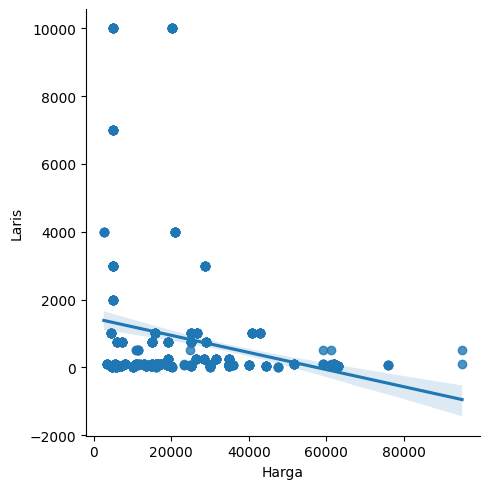

In [46]:
import seaborn as sns
sns.lmplot(data=df,x='Harga', y='Laris')

Dari visualisasi data ini dapat diambil kesimpulan bahwa pengujian korelasi ini menggunakan **metode spearman** dikarenakan terdapat outlier yang lumayan banyak.

In [37]:
corr_rho, pval_s = stats.spearmanr(df['Harga'], df['Laris'])

print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")

rho-correlation: -0.13, p-value: 0.0012410163307078272


Secara keseluruhan dapat disimpulkan bahwa korelasi antara **harga** dan **jumlah** produk yang terjual tidak saling berhubungan. Jadi ini menunjukkan bahwa orang tidak sepenuhnya cenderung memilih untuk membeli produk yang lebih murah. Harga bukan satu-satunya faktor yang mempengaruhi keputusan pembelian.

## E. Conclusion

### Recap

1. ***Harga vs Penjualan***:

    Terdapat korelasi negatif lemah antara harga dan jumlah penjualan. Ini berarti produk dengan harga lebih murah cenderung sedikit lebih laris, tetapi tidak secara signifikan menentukan keputusan pembelian.

2. ***Perbedaan Harga Wilayah***:

    Ditemukan perbedaan harga yang cukup signifikan antara produk di wilayah jabodetabek dan luar jabodetabek.

3. ***Distribusi Harga***:

    Harga produk tidak terdistribusi normal, dengan beberapa outlier produk yang jauh lebih mahal dari mayoritas.

4. ***Preferensi Pembeli***:

    Keputusan pembeli membeli produk tidak hanya dipengaruhi oleh harga, tetapi ada faktor lain seperti kualitas dan reputasi produk juga memainkan peran penting.

### Insight

Pembeli tidak selalu memilih produk termurah, tetapi cenderung mempertimbangkan faktor kualitas dan rating juga.Hal ini terlihat dari rating tinggi pada produk dengan harga bervariasi dan terdapat perbedaan harga signifikan antara wilayah jabodetabek dan luar jabodetabek.

### Summary

Berdasarkan analisis dari berbagai kolom (nama produk, harga produk, laris, dan rating) dalam dataset ini ada beberapa strategi yang mungkin bisa dilakukan untuk meningkatkan penjualan sebesar 10% dalam waktu 3 bulan, yaitu:

1. ***Variasi produk***: Menawarkan variasi produk seblak dengan rasa yang unik dan berbeda dari yang lain untuk menarik segmen pasar yang lebih luas.

2. ***Pemasaran dan promosi***: Menawarkan diskon atau bundling untuk produk yang kurang laris guna meningkatkan penjualan.

3. ***Analisis data penjualan***: Menggunakan analisis data untuk mengidentifikasi produk yang laris dan kurang laris di pasaran serta memahami preferensi pelanggan serta enyesuaikan stok dan strategi pemasaran berdasarkan analisis data.

4. ***Evaluasi tren pembelian***: Penjualan disetiap minggu tidak signifikan dapat digunakan sebagai dasar strategi. Oleh karena itu periode penjualan bukanlah menjadi hal yang dapat diandalkan sebagai strategi.

Dengan menerapkan strategi-strategi ini, diharapkan penjualan produk seblak dapat meningkatkan target revenue sebesar 10% pada 3 bulan kedepan.